### Patrick Horlaville (260931235) - Problem Set 1 - PHYS 641 : Observational Techniques in Modern Astrophysics


Prof: Jon Sievers. TA: Anan Lu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc,rcParams
from matplotlib.ticker import ScalarFormatter

First we define a function that solves the least-squares fit parameters using the classical linear least squares

In [3]:
def classical(A, N, d):
    
    At = A.T
    N_1 = np.linalg.inv(N)
    
    At_N1_A = np.dot(At, np.dot(N_1, A))
    At_N1_d = np.dot(At, np.dot(N_1, d))

    m = np.dot(np.linalg.inv(At_N1_A), At_N1_d)
    
    return m

Next we define the function that solves the least-squares fit parameters using the QR decomposition linear least-squares

In [4]:
def QR(A, N, d):
    
    Q, R = np.linalg.qr(A)
    Qt = Q.T
    N_1 = np.linalg.inv(N)

    Qt_N1_Q_R = np.dot(Qt, np.dot(N_1, np.dot(Q, R)))
    Qt_N1_d = np.dot(Qt, np.dot(N_1, d))

    m = np.dot(np.linalg.inv(Qt_N1_Q_R), Qt_N1_d)
    
    return m

Now, we can try to perform a fit using both methods on the same function at different orders and try to see how both methods' performance compare

We will fit over the function 

In [85]:
def funct(x):
    return np.sin(x)*np.exp(-x)

In [86]:
x_funct = np.linspace(0, 5, 100)
y_funct = funct(x_funct)

Text(0.5, 1.0, 'True function')

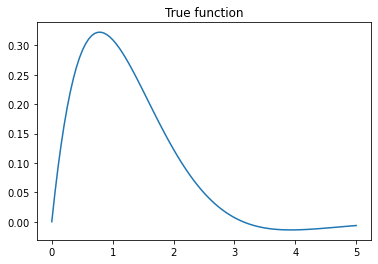

In [87]:
plt.plot(x_funct, y_funct)
plt.title('True function')

To make things easier we can make a function that will directly compute the parameters' solutions for a given x range and a given fit order for our function

In [88]:
def comp_fits(x, order):
    
    n = len(x)
    
    A = np.zeros([n, order + 1])
    for i in range(order + 1):
        A[:,i] = x**i
    
    y = funct(x)
    
    m_classical = classical(A, np.eye(n), y)   
    y_classical = np.dot(A, m_classical)
    
    m_qr = QR(A, np.eye(n), y)
    y_qr = np.dot(A, m_qr)
    
    return y_classical, y_qr

First, try a low order fit on our function

In [92]:
y_cl5, y_qr5 = comp_fits(x_funct, 5)

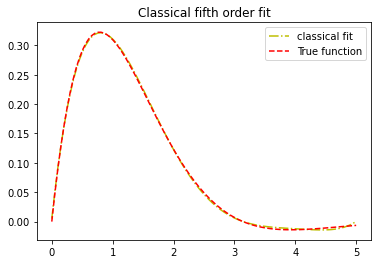

In [94]:
plt.plot(x_funct, y_cl5, ls = '-.', color = 'y', label = 'classical fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('Classical fifth order fit')
plt.legend()

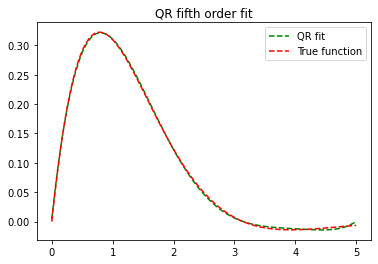

In [95]:
plt.plot(x_funct, y_qr5, ls = '--', color = 'g', label = 'QR fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('QR fifth order fit')
plt.legend()

Both fits are well behaved

Now, we can try higher order fits

In [96]:
y_cl50, y_qr50 = comp_fits(x_funct, 50)

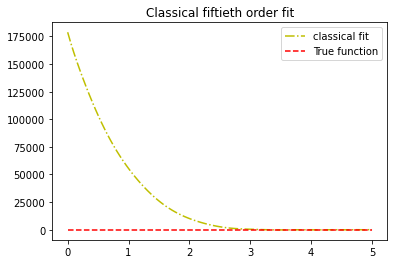

In [97]:
plt.plot(x_funct, y_cl50, ls = '-.', color = 'y', label = 'classical fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('Classical fiftieth order fit')
plt.legend()

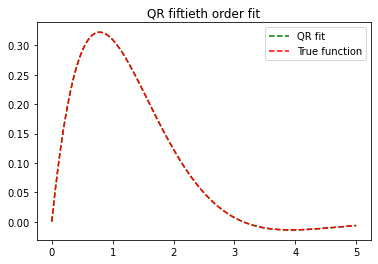

In [100]:
plt.plot(x_funct, y_qr50, ls = '--', color = 'g', label = 'QR fit')
plt.plot(x_funct, y_funct, ls = '--', color = 'r', label = 'True function')
plt.title('QR fiftieth order fit')
plt.legend()

Hence, there are cases where the classical fit breaks and the QR fit behaves correctly